In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Análise de dados e pré processamento

In [2]:
df = pd.read_csv('alzheimers_prediction_dataset.csv')
df.head(1)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No


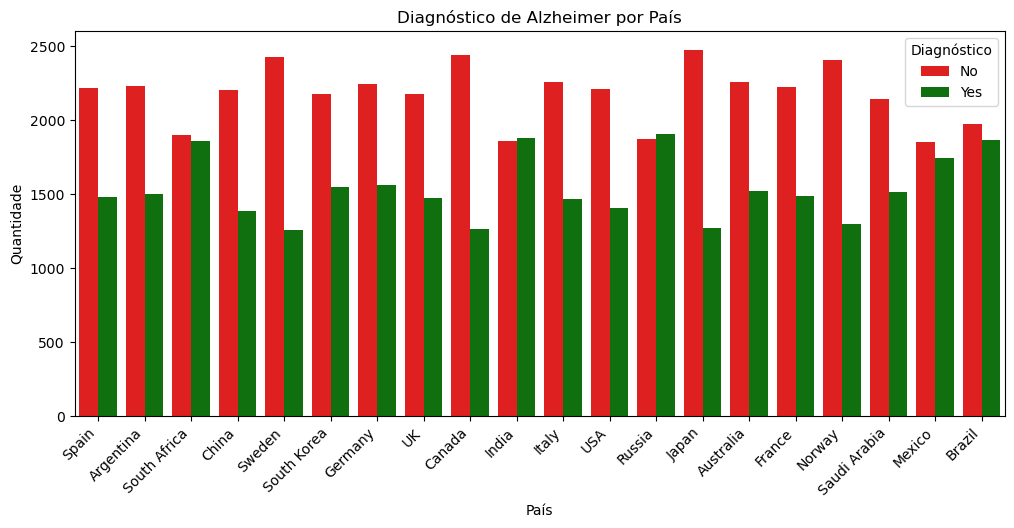

In [3]:
plt.figure(figsize=(12, 5))
sns.countplot(x="Country", hue="Alzheimer’s Diagnosis", data=df, palette={"Yes": "green", "No": "red"})

plt.xticks(rotation=45, ha="right")  
plt.title("Diagnóstico de Alzheimer por País")
plt.xlabel("País")
plt.ylabel("Quantidade")
plt.legend(title="Diagnóstico")
plt.show()


In [7]:
df.shape

(74283, 25)

In [9]:
# Removendo coluna county,não é relevante para o resultado final
df.drop(columns=['Country'], inplace=True)

In [11]:
df.isnull().sum()

Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living                   0
Alzheimer’s Diagnosis             

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   74283 non-null  int64  
 1   Gender                                74283 non-null  object 
 2   Education Level                       74283 non-null  int64  
 3   BMI                                   74283 non-null  float64
 4   Physical Activity Level               74283 non-null  object 
 5   Smoking Status                        74283 non-null  object 
 6   Alcohol Consumption                   74283 non-null  object 
 7   Diabetes                              74283 non-null  object 
 8   Hypertension                          74283 non-null  object 
 9   Cholesterol Level                     74283 non-null  object 
 10  Family History of Alzheimer’s         74283 non-null  object 
 11  Cognitive Test 

In [15]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [17]:
# Ajustando variáveis
df['Gender'].replace({'Female':0, 'Male':1}, inplace = True)
df['Physical Activity Level'].replace({'Low':0, 'Medium':1, 'High':2}, inplace = True)
df['Smoking Status'].replace({'Current':0, 'Never':1, 'Former':2}, inplace = True)
df['Alcohol Consumption'].replace({'Regularly':0, 'Never':1, 'Occasionally':2}, inplace = True)
df['Diabetes'].replace({'Yes':0, 'No':1}, inplace = True)
df['Hypertension'].replace({'Yes':0, 'No':1}, inplace = True)
df['Family History of Alzheimer’s'].replace({'Yes':0, 'No':1}, inplace = True)
df['Depression Level'].replace({'Low':0, 'Medium':1, 'High':2}, inplace = True)
df['Sleep Quality'].replace({'Poor':0, 'Average':1, 'Good':2}, inplace = True)
df['Dietary Habits'].replace({'Unhealthy':0, 'Average':1, 'Healthy':2}, inplace = True)
df['Air Pollution Exposure'].replace({'Low':0, 'Medium':1, 'High':2}, inplace = True)
df['Employment Status'].replace({'Retired':0, 'Unemployed':1, 'Employed':2}, inplace = True)
df['Marital Status'].replace({'Single':0, 'Married':1, 'Widowed':2}, inplace = True)
df['Genetic Risk Factor (APOE-ε4 allele)'].replace({'Yes':0, 'No':1}, inplace = True)
df['Social Engagement Level'].replace({'Low':0, 'Medium':1, 'High':2}, inplace = True)
df['Income Level'].replace({'Low':0, 'Medium':1, 'High':2}, inplace = True)
df['Cholesterol Level'].replace({'Normal':0, 'High':1}, inplace = True)
df['Stress Levels'].replace({'Low':0, 'Medium':1, 'High':2}, inplace = True)
df['Urban vs Rural Living'].replace({'Rural':0, 'Urban':1}, inplace = True)
df['Alzheimer’s Diagnosis'].replace({'Yes':0, 'No':1}, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   74283 non-null  int64  
 1   Gender                                74283 non-null  int64  
 2   Education Level                       74283 non-null  int64  
 3   BMI                                   74283 non-null  float64
 4   Physical Activity Level               74283 non-null  int64  
 5   Smoking Status                        74283 non-null  int64  
 6   Alcohol Consumption                   74283 non-null  int64  
 7   Diabetes                              74283 non-null  int64  
 8   Hypertension                          74283 non-null  int64  
 9   Cholesterol Level                     74283 non-null  int64  
 10  Family History of Alzheimer’s         74283 non-null  int64  
 11  Cognitive Test 

In [21]:
df.shape

(74283, 24)

In [23]:
previsores = df.iloc[:, 0:23]
alvo = df['Alzheimer’s Diagnosis']

In [25]:
# Botando previsores em escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores_esc = scaler.fit_transform(previsores)

# Testando modelos de Machine Learning

In [302]:
from sklearn.model_selection import train_test_split 

x_treino, x_teste , y_treino, y_teste = train_test_split(previsores, alvo, test_size = 0.3,  random_state = 0)

## Regressão logística

In [305]:
from sklearn.linear_model import LogisticRegression

In [307]:
RL = LogisticRegression(random_state =1, penalty='l2',C=1)

In [309]:
RL.fit(x_treino, y_treino)

LogisticRegression(C=1, random_state=1)

In [311]:
RL_previsores = RL.predict(x_teste)

In [313]:
print(f"Acurácia:{accuracy_score(y_teste, RL_previsores) * 100:.2f}%")

Acurácia:71.31%


In [315]:
# Fazendo validação cruzada
from sklearn.model_selection import cross_val_score, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(f" Acurácia média:{cross_val_score(RL, previsores, alvo, cv=kf, scoring='accuracy').mean() * 100:.2f}%")

 Acurácia média:70.95%


## Naive Bayes

In [318]:
from sklearn.naive_bayes import GaussianNB

In [320]:
NB = GaussianNB()
NB.fit(x_treino, y_treino)

GaussianNB()

In [322]:
NB_previsores = NB.predict(x_teste)

In [324]:
print(f"Acurácia:{accuracy_score(NB_previsores,y_teste) *100 :.2f}%")

Acurácia:70.09%


In [326]:
print(f" Acurácia média:{cross_val_score(NB, previsores, alvo, cv=kf, scoring='accuracy').mean() * 100:.2f}%")

 Acurácia média:69.95%


## KNN

In [329]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 25,p=1)

In [331]:
KNN.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=25, p=1)

In [333]:
KNN_previsores = KNN.predict(x_teste)

In [334]:
print(f"Acurácia:{accuracy_score(KNN_previsores,y_teste) *100:.2f}%")

Acurácia:71.36%


In [337]:
print(f" Acurácia média:{cross_val_score(KNN, previsores, alvo, cv=kf, scoring='accuracy').mean() * 100:.2f}%")

 Acurácia média:70.69%


## Decision tree

In [341]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion= 'gini', random_state=0)

In [343]:
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=0)

In [345]:
arvore_previsores = arvore.predict(x_teste)

In [347]:
print(f"Acurácia:{accuracy_score(arvore_previsores,y_teste) *100:.2f}%")

Acurácia:63.23%


In [349]:
print(f" Acurácia média:{cross_val_score(arvore, previsores, alvo, cv=kf, scoring='accuracy').mean() * 100:.2f}%")

 Acurácia média:62.72%


## Random Forest

In [409]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 0,max_depth = 10)
RF.fit(x_treino,y_treino)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [410]:
RF_previsores = RF.predict(x_teste)

In [411]:
print(f"Acurácia:{accuracy_score(RF_previsores,y_teste) *100:.2f}%")

Acurácia:72.79%


In [412]:
print(f" Acurácia média:{cross_val_score(RF, previsores, alvo, cv=kf, scoring='accuracy').mean() * 100:.2f}%")

 Acurácia média:72.49%


In [525]:
cm = confusion_matrix(RF_previsores,y_teste)

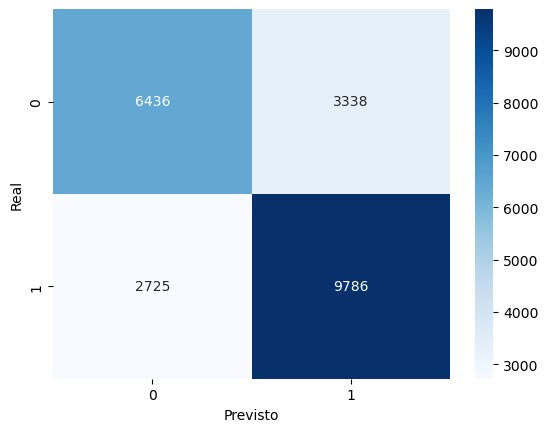

In [523]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

## XGBoost

In [418]:
pip install xgboost

In [505]:
import xgboost as xgb
XGB = xgb.XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42)

In [507]:
XGB.fit(x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [508]:
XGB_previsores = XGB.predict(x_teste)

In [511]:
print(f"Acurácia:{accuracy_score(XGB_previsores,y_teste) *100:.2f}%")

Acurácia:73.04%


In [513]:
print(f" Acurácia média:{cross_val_score(XGB, previsores, alvo, cv=kf, scoring='accuracy').mean() * 100:.2f}%")

 Acurácia média:72.60%


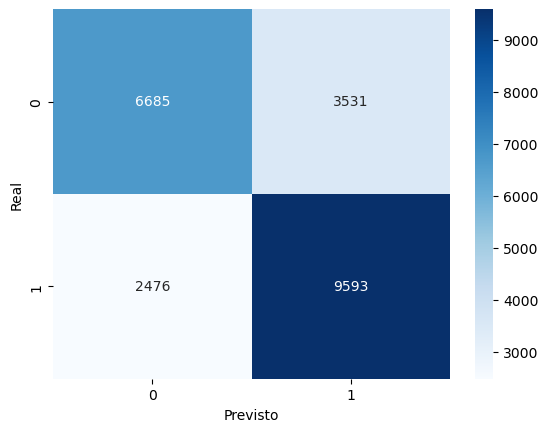

In [605]:
cm = confusion_matrix(XGB_previsores,y_teste)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

## Redes neurais

In [528]:
from sklearn.neural_network import MLPClassifier

In [593]:
## Quantidade de neuronios  = (NE+NS)/2 = 12 OU 2/3.NE + NS = 16
RN = MLPClassifier(hidden_layer_sizes=(12), max_iter = 1000, random_state=42)
RN.fit(x_treino, y_treino)

MLPClassifier(hidden_layer_sizes=12, max_iter=1000, random_state=42)

In [594]:
RN_previsores = RN.predict(x_teste)

In [595]:
print(f"Acurácia:{accuracy_score(RN_previsores,y_teste) *100:.2f}%")

Acurácia:71.09%


In [599]:
print(f" Acurácia média:{cross_val_score(RN, previsores, alvo, cv=kf, scoring='accuracy').mean() * 100:.2f}%")

 Acurácia média:70.98%


## Resultados dos algorítmos
#### Naive Bayes: 69.95%
#### KNN: 70.69%
#### Decision Tree: 62.72%
#### Random Forest: 72.49%
#### XGBoost: 72.60%
#### Redes Neurais: 70.98%
#### Vencedor-> XGBoost